## Object Detection in Image using YoloV5

### Introduction - Object detection identifies and locates objects within images. YOLOv5, a fast and accurate deep learning model, excels in real-time object detection by predicting bounding boxes and class probabilities in one pass. It is widely used in applications like autonomous driving and surveillance due to its speed and precision.

### 1. Importing the necessary modules

In [1]:
import torch # Works with tensors, builds neural networks efficiently
import cv2 # Facilitates image processing, video analysis, computer vision tasks
from matplotlib import pyplot as plt # Plots data, displays images, visualizes results effectively

### 2. Checing & Setting the Gpu

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Checking for the availability of Gpu
print(f'Using device: {device}') # Displaying the used device

Using device: cuda


#### YOLOv5 Model - YOLOv5 is a cutting-edge object detection model renowned for its impressive speed and accuracy. It offers several variants to meet diverse needs: YOLOv5s (small) for lightweight applications, YOLOv5m (medium) for a balanced approach, YOLOv5l (large) for higher performance, and YOLOv5x (extra-large) for the most demanding tasks. Each variant balances the trade-offs between speed, accuracy, and computational resources, making YOLOv5 highly adaptable for various real-world scenarios and applications.

### 3. Loading the YOLOv5 Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x') # Loads YOLOv5 model, from ultralytics/yolov5 repository source
model.to(device) # Transfers model to selected device, GPU or CPU

Using cache found in C:\Users\AjayJ03/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-8-4 Python-3.12.4 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

100%|██████████| 166M/166M [01:16<00:00, 2.29MB/s] 

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 80, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1

### 4. Loading and Displaying the Image

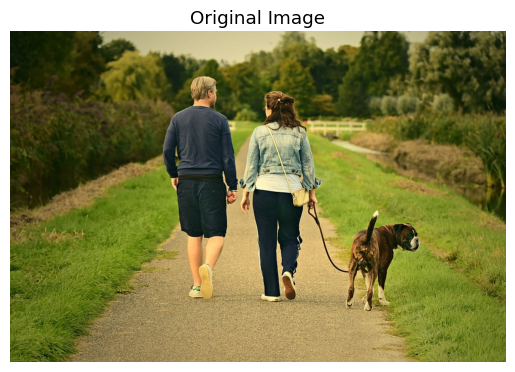

In [4]:
# Displays plots directly in Jupyter Notebook cells.
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Reads images in Matplotlib, displayed with imshow function

# Load and display the image
image = mpimg.imread('testimage.jpg')
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

### 5. Reading the Image with OpenCV

In [5]:
img_path = 'testimage.jpg'
img = cv2.imread(img_path)

### 6. Converting the Image with OpenCV

#### Converting an image from BGR to RGB using `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` with OpenCV is necessary because OpenCV loads images in BGR (Blue, Green, Red) format by default, while many other libraries, including those used for deep learning and computer vision tasks, expect images in RGB (Red, Green, Blue) format. This conversion ensures compatibility with these libraries and corrects color representation for accurate processing and visualization.

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### 7. Printing & Visualizing Detection Results

In [7]:
results = model(img_rgb)
results.print()

image 1/1: 640x960 2 persons, 1 dog, 1 handbag
Speed: 311.1ms pre-process, 40.6ms inference, 478.2ms NMS per image at shape (1, 3, 448, 640)


### 8. Visualizing Detection Results & Saving the Annotated Image

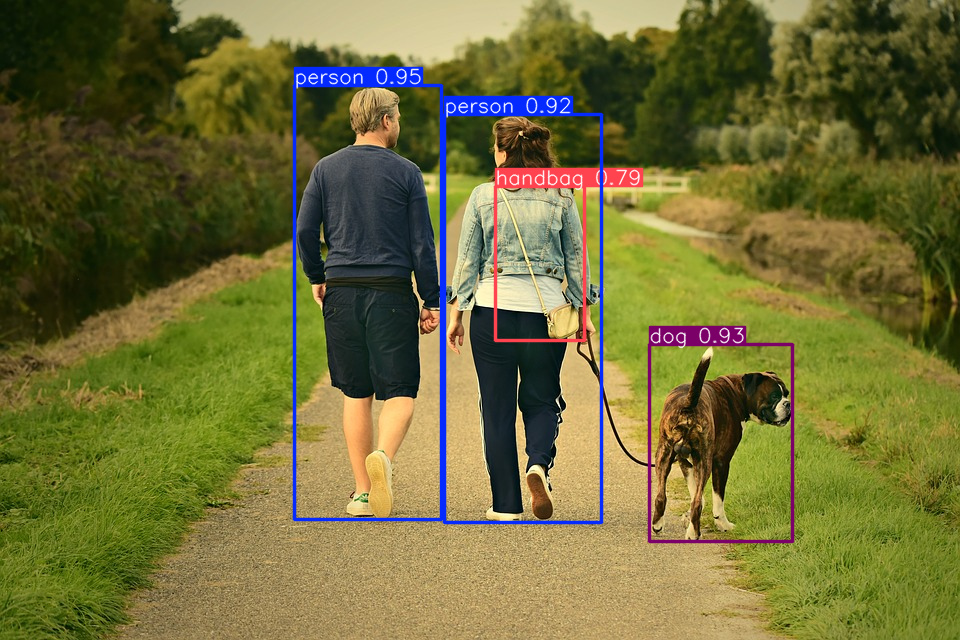

Saved 1 image to runs\detect\exp


In [8]:
results.show()
results.save('imageoutput.jpg')